### STA 4724: Homework 3 - Due Friday, Oct. 18 
**Instructions**: Finish the assignment by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Katelyn Choudhari             

**Your ID:** 5368756

## Question 1: kNN
For the *yeast* dataset, we want to predicte the compartment in a cell that a yeast protein will localize to based on properties of its sequence.

**(a)** Read the training and testing datasets.

In [15]:
import pandas as pd
import numpy as np

# open and read the csv file with pandas
yeastTrain = pd.read_csv('yeast_train.csv')
yeastTest = pd.read_csv('yeast_test.csv')

# make the features and labels for training
XTrain = yeastTrain.iloc[:, :-1].values  # features
YTrain = yeastTrain.iloc[:, -1].values   # labels

# make the features and labels for testing
XTest = yeastTest.iloc[:, :-1].values  # features
YTest = yeastTest.iloc[:, -1].values   # labels

# # print the first few rows of the csv table to check file can be opened and read
print(yeastTrain.head())
print(yeastTest.head())

   id    f0    f1    f2    f3   f4   f5    f6    f7 class
0   1  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1   2  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2   3  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3   4  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4   5  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
   id    f0    f1    f2    f3   f4   f5    f6    f7 class
0   1  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22   CYT
1   2  0.40  0.42  0.57  0.35  0.5  0.0  0.53  0.25   CYT
2   3  0.58  0.47  0.54  0.11  0.5  0.0  0.51  0.26   NUC
3   4  0.50  0.34  0.55  0.21  0.5  0.0  0.49  0.22   NUC
4   5  0.61  0.60  0.55  0.21  0.5  0.0  0.50  0.25   NUC


**(b)** Use leave-one-out cross validation to select the value of $k$ for kNN model.

Hint 1: try to apply kNN with a fixed $k$ first, then figure out how to use cross validation. In *yeast_3.txt*, I list the result when $k=3$ and you can use it as a reference.

Hint 2: Some of the $k$ values are not suitable to be the "best". You shouldn't even test them in the cross validation.

In [18]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Manually set the range of k values to test
bestK = None  # Placeholder for the best k value after LOOCV

# scale the training data, apply kNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# leave-one-out CV (LOOCV) to select the best k
loo = LeaveOneOut()

# loop through different k values to find the best one using LOOCV
bestAccuracy = 0

for k in range(1, 21, 2):  # loop through odd k values
    pipeline.set_params(knn__n_neighbors = k)  # set the current k value
    accuracySum = 0
    for trainIdx, testIdx in loo.split(XTrain):
        pipeline.fit(XTrain[trainIdx], YTrain[trainIdx])
        accuracySum += pipeline.score(XTrain[testIdx], YTrain[testIdx])
    avgAccuracy = accuracySum / len(XTrain)
    
    if avgAccuracy > bestAccuracy:
        bestAccuracy = avgAccuracy
        bestK = k

print(f'Best k value based on LOOCV: {bestK}')

Best k value based on LOOCV: 11


**(c)** Train the kNN model with the best $k$, and use it to predicte the testing data.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# train the model with the best k value
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = bestK))
])

# train the model on the entire training set
pipeline.fit(XTrain, YTrain)

# predict the test set results
yPred = pipeline.predict(XTest)

# print the predicted values for the test set
print('Predicted values:', yPred)

Predicted values: ['POX' 'CYT' 'CYT' 'NUC' 'CYT' 'EXC' 'CYT' 'CYT' 'MIT' 'ME1' 'EXC' 'MIT'
 'CYT' 'ME1' 'CYT' 'CYT' 'CYT' 'MIT' 'MIT' 'NUC' 'CYT' 'CYT' 'CYT' 'ME1'
 'MIT' 'CYT' 'MIT' 'POX' 'ME3' 'MIT' 'ME1' 'ME3' 'CYT' 'CYT' 'CYT' 'POX'
 'NUC' 'MIT' 'CYT' 'MIT' 'ME3' 'NUC' 'NUC' 'CYT' 'CYT' 'CYT' 'MIT' 'NUC'
 'NUC' 'NUC' 'NUC' 'CYT' 'CYT' 'MIT' 'CYT' 'MIT' 'POX' 'NUC' 'CYT' 'ME1'
 'MIT' 'MIT' 'MIT' 'ME3' 'MIT' 'MIT' 'MIT' 'CYT' 'CYT' 'CYT' 'EXC' 'CYT'
 'CYT' 'MIT' 'CYT' 'MIT' 'EXC' 'EXC' 'CYT' 'CYT' 'NUC' 'CYT' 'ME3' 'POX'
 'CYT' 'NUC' 'CYT' 'NUC' 'MIT' 'CYT' 'CYT' 'CYT' 'NUC' 'CYT' 'ME3' 'CYT'
 'CYT' 'ME2' 'CYT' 'CYT' 'CYT' 'CYT' 'NUC' 'EXC' 'ERL' 'CYT' 'CYT' 'ME3'
 'ME3' 'POX' 'ME3' 'ME1' 'ME1' 'CYT' 'ME3' 'ME3' 'MIT' 'CYT' 'NUC' 'CYT'
 'CYT' 'ME3' 'CYT' 'CYT' 'ME3' 'NUC' 'NUC' 'NUC' 'ME3' 'CYT' 'CYT' 'NUC'
 'CYT' 'CYT' 'NUC' 'NUC' 'MIT' 'NUC' 'CYT' 'CYT' 'NUC' 'MIT' 'NUC' 'CYT'
 'NUC' 'NUC' 'MIT' 'MIT' 'ME3' 'NUC' 'CYT' 'NUC' 'MIT' 'MIT' 'MIT' 'NUC'
 'CYT' 'ME3' 'ME3' 'NUC' 'MIT' 'M

**(d)** Print the confusion matrix, then manually compute the accuracy based on the confusion matrix. That is, don't call any built-in function for the accuracy, but type the equation you will use for calculating the accuracy.

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix
confusionMatrix = confusion_matrix(YTest, yPred)
print('Confusion Matrix:')
print(confusionMatrix)

# calculate accuracy based on the confusion matrix
correctPredictions = np.trace(confusionMatrix)
totalPredictions = np.sum(confusionMatrix)

# calculate accuracy
manualAccuracy = correctPredictions / totalPredictions
print(f'Accuracy: {manualAccuracy * 100:.2f}%')

Confusion Matrix:
[[88  2  1  0  0  2 16 28  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  8  1  0  0  0  0  0  0]
 [ 0  0  4  9  0  0  1  0  0  0]
 [ 5  0  0  3  3  2  4  1  0  0]
 [ 4  0  0  0  0 38  2  3  0  0]
 [18  0  0  2  1  2 48  8  2  0]
 [53  0  1  0  0  3 13 53  0  0]
 [ 1  0  0  0  0  0  1  1  5  0]
 [ 5  0  0  0  0  0  1  0  0  0]]
Accuracy: 56.63%


## Question 2: Logistic Regression

We study the *myopia* dataset in this problem.

**(a)** Read the data file and make a scatterplot of MYOPIA vs. SPHEQ.

   ID  STUDYYEAR  MYOPIC  AGE  GENDER  SPHEQ         AL    ACD     LT    VCD  \
0   1       1992       1    6       1 -0.052  21.889999  3.690  3.498  14.70   
1   2       1995       0    6       1  0.608  22.379999  3.702  3.392  15.29   
2   3       1991       0    6       1  1.179  22.490000  3.462  3.514  15.52   
3   4       1990       1    6       1  0.525  22.200001  3.862  3.612  14.73   
4   5       1995       0    5       0  0.697  23.290001  3.676  3.454  16.16   

   SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0       45       8       0        0    10         34      1      1  
1        4       0       1        1     7         12      1      1  
2       14       0       2        0    10         14      0      0  
3       18      11       0        0     4         37      0      1  
4       14       0       0        0     4          4      1      0  


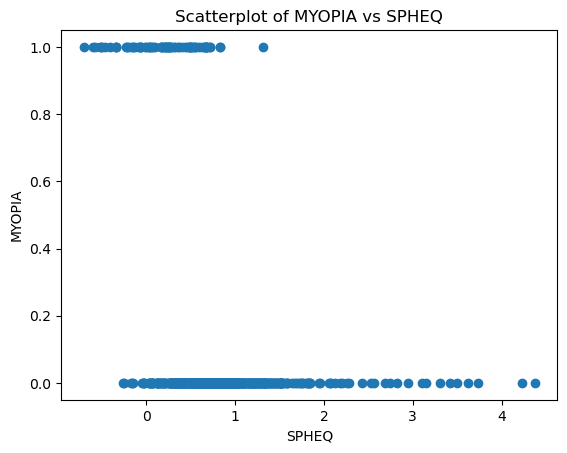

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# open and read the csv file with pandas
myopiaData = pd.read_csv('myopia.csv')

print(myopiaData.head())

# scatterplot
plt.scatter(myopiaData['SPHEQ'], myopiaData['MYOPIC'])
plt.xlabel('SPHEQ')
plt.ylabel('MYOPIA')
plt.title('Scatterplot of MYOPIA vs SPHEQ')
plt.show()

**(b)** Fit the logistic regression model of SPHEQ on MYOPIA

In [32]:
import statsmodels.api as sm

X = myopiaData['SPHEQ']
X = sm.add_constant(X)  # adds a constant term to the predictor
Y = myopiaData['MYOPIC']

# fit the logistic regression model
logitModel = sm.Logit(Y, X)
result = logitModel.fit()

# print the summary of the logistic regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2973
Time:                        23:37:14   Log-Likelihood:                -168.67
converged:                       True   LL-Null:                       -240.04
Covariance Type:            nonrobust   LLR p-value:                 6.727e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0540      0.207      0.261      0.794      -0.351       0.459
SPHEQ         -3.8331      0.

**(c)** Plot the logistic function found in (b) together with the scatterplot. You are looking for something like 

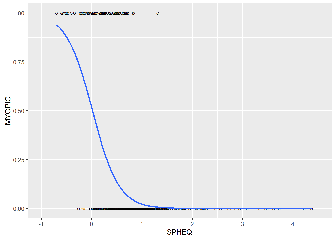

Hint: Although we didn't make this logistic function plot in class, the idea behind it is similar to the linear function plot in the earlier lecture. 

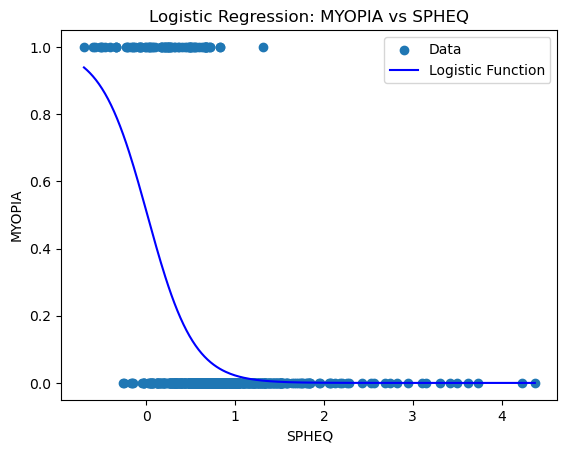

In [35]:
import numpy as np

# scatterplot
plt.scatter(myopiaData['SPHEQ'], myopiaData['MYOPIC'], label = 'Data')

# generate SPHEQ values for the logistic function
spheqValues = np.linspace(min(myopiaData['SPHEQ']), max(myopiaData['SPHEQ']), 300)
spheqValuesWithConstant = sm.add_constant(spheqValues)

# predict the logistic function values
logitPred = result.predict(spheqValuesWithConstant)

# plot the logistic function
plt.plot(spheqValues, logitPred, color = 'blue', label = 'Logistic Function')
plt.xlabel('SPHEQ')
plt.ylabel('MYOPIA')
plt.legend()
plt.title('Logistic Regression: MYOPIA vs SPHEQ')
plt.show()

## Question 3: Naive Bayes
We have the *vote* datasets collected from 1984 United States Congressional Voting Records.

**(a)** Read the training and testing data file, and make any necessary preprocess so the data is ready to be used by naive bayes.

Hint: computer cannot read 'y/n' just like it cannot read tweets directly.

In [38]:
import pandas as pd

#suppress warning
pd.set_option('future.no_silent_downcasting', True)

# open and read the csv file with pandas
trainDF = pd.read_csv('vote_train.csv')
testDF = pd.read_csv('vote_test.csv')

# remove quotation marks from column names
trainDF.columns = trainDF.columns.str.replace("'", "").str.strip()
testDF.columns = testDF.columns.str.replace("'", "").str.strip()

# replace 'y' with 1 and 'n' with 0 in both training and testing data
trainDF.replace({'y': 1, 'n': 0}, inplace = True)
testDF.replace({'y': 1, 'n': 0}, inplace = True)

# convert 'class' column to numeric (0 for republican, 1 for democrat)
trainDF['class'] = trainDF['class'].map({'republican': 0, 'democrat': 1})
testDF['class'] = testDF['class'].map({'republican': 0, 'democrat': 1})

# check if any non-numeric columns remain
print(trainDF.dtypes)

# convert only numeric columns (excluding 'class') to integers
trainDF.iloc[:, :-1] = trainDF.iloc[:, :-1].astype(int)
testDF.iloc[:, :-1] = testDF.iloc[:, :-1].astype(int)

# output to verify
print(trainDF.head())
print(testDF.head())

id                                         int64
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
class                                      int64
dtype: object
   id handicapped-infants water-project-cost-sharing  \
0   1                   0                       

**(b)** Train the bayes model and use it to predict the voting result on the testing data.

In [41]:
from sklearn.naive_bayes import GaussianNB

# make the features and labels for training
XTrain = trainDF.drop(columns = ['id', 'class'])
yTrain = trainDF['class']

# make the features and labels for testing
XTest = testDF.drop(columns = ['id', 'class'])
yTest = testDF['class']

# train the Naive Bayes classifier
nbModel = GaussianNB()
nbModel.fit(XTrain, yTrain)

# predict the class probabilities for the test data
yProb = nbModel.predict_proba(XTest)[:, 1]

# predict the classes
yPred = nbModel.predict(XTest)

# output predictions
print(yPred)

[0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0]


**(c)** Plot the ROC curve and report AUC.

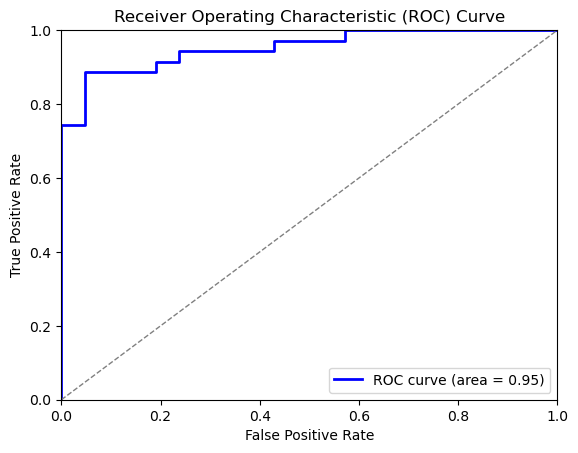

AUC: 0.95


In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(yTest, yProb)
rocAUC = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (area = {rocAUC:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

# print AUC value
print(f"AUC: {rocAUC:.2f}")

**(d) Extra question, No bonus point)** Based on the data in the traning set, what's the most significant character for the republican voters? Can you write a short program to find it out? 

Hint: We didn't cover this in class.

**Answer:** 

In [48]:
import numpy as np

featureimportances = np.abs(nbModel.theta_[1] - nbModel.theta_[0])

# find the most significant feature
mostSignificantFeatureIndex = np.argmax(featureimportances)
mostSignificantFeatureName = XTrain.columns[mostSignificantFeatureIndex]

print(f'The most significant feature for Republican voters is: {mostSignificantFeatureName}')

The most significant feature for Republican voters is: physician-fee-freeze
